In [46]:
import pandas as pd
import matplotlib.pyplot as plt  

In [47]:
excelDatFile = pd.ExcelFile('Plant_DTS.xls')
Data = {}

for sheet_name in excelDatFile.sheet_names:
    sheetData = excelDatFile.parse(sheet_name)
    print(f"Data Sheet: {sheet_name}")
    Data[sheet_name] = sheetData


Data Sheet: Plant_FACT
Data Sheet: Accounts
Data Sheet: Plant_Hierarchy


In [48]:
Data['Plant_FACT'].head()

,Product_id,Sales_USD,quantity,Price_USD,COGS_USD,Date_Time,Account_id
0,2625,16156.56,502.00,32.184382,14104.67688,2024-03-29,1599-E6G-78670
1,2569,13831.29,679.92,20.342526,10470.28653,2022-07-13,1227--40
2,2195,17402.14,925.66,18.799710,10528.29470,2023-04-05,1857--758
3,2530,15866.42,809.78,19.593495,12883.53304,2022-09-24,1793-6140-77
4,2889,6200.48,311.43,19.909707,5388.21712,2023-10-19,1725-40230-69


In [49]:
Data['Accounts'].head()

,country_code,Account,Master_id,Account_id,latitude2,longitude,country2,Postal_code,street_name,Street_number
0,CA,"Gerlach, Cassin and Parker",1599,1599-E6G-78670,45.989139,-67.241222,Canada,E6G,Oneill,78670
1,CN,Ziemann LLC,1227,1227--40,37.943121,115.217658,China,0,Kipling,40
2,CN,"Medhurst, Aufderhar and Mosciski",1857,1857--758,26.170171,118.190467,China,0,Glendale,758
3,AR,Larson-Fritsch,1793,1793-6140-77,-33.916294,-64.389795,Argentina,6140,Manley,77
4,MX,Jast-Quigley,1725,1725-40230-69,18.559181,-99.598300,Mexico,40230,Leroy,69


In [50]:
Data['Plant_Hierarchy'].head()

,Product_Family,Product_Family_Id,Product_Group,Product_Group_id,Product_Name,Product_Name_id,Product_Size,Produt_Type
0,Cucurbitaceae,1051,Gray's Bur Cucumber,3293,Chamaesyce celastroides (Boiss.) Croizat & O. ...,2000,Small,Landscape
1,Platanaceae,1138,Arizona Sycamore,3658,Tetraplasandra waimeae Wawra,2001,Medium,Outdoor
2,Scrophulariaceae,1167,Little Elephantshead,3876,Iris √ónelsonii Randolph,2002,Small,Outdoor
3,Euphorbiaceae,1065,'ekoko,3357,Acanthus L.,2003,Large,Outdoor
4,Amaranthaceae,1006,Philoxerus,3017,Aplectrum hyemale (Muhl. ex Willd.) Torr.,2004,Medium,Landscape


In [51]:
Data['Plant_FACT'].isnull().sum()

Product_id    0
Sales_USD     0
quantity      0
Price_USD     0
COGS_USD      0
Date_Time     0
Account_id    0
dtype: int64

In [52]:
Data['Plant_FACT'].dtypes

Product_id             int64
Sales_USD            float64
quantity             float64
Price_USD            float64
COGS_USD             float64
Date_Time     datetime64[ns]
Account_id            object
dtype: object

We do not need the `Product_id` column to be of int data type since it is not used in any mathematical calculations or analysis

In [53]:
Data['Plant_FACT']['Product_id'] = Data['Plant_FACT']['Product_id'].astype(object)

Anomalies exploring and undertanding the nature of data

In [54]:
Data['Plant_FACT'].describe()

,Sales_USD,quantity,Price_USD,COGS_USD,Date_Time
count,2440.00000,2440.000000,2440.000000,2440.000000,2440
mean,12326.34777,509.321291,57.841137,7423.592509,2023-02-17 16:40:55.081967104
min,5003.34000,10.930000,5.132463,1528.074700,2022-01-01 00:00:00
25%,8571.21750,271.585000,15.432054,4724.698500,2022-07-27 18:00:00
50%,12345.98000,508.230000,24.351932,6767.151340,2023-02-22 00:00:00
75%,15900.68250,748.087500,46.486099,9642.392765,2023-09-14 00:00:00
max,19993.98000,999.550000,1652.590135,17311.724820,2024-04-14 00:00:00
std,4334.27783,283.406957,123.072843,3483.287521,NaN


for `Date_Time` min and max values the minimum Date Time is 2022-01-01 and the maximum is 2024-04-14 This tells that this dataset spans over 2 years and 3 months

#### Identify top accounts based on performance

In [55]:
Data['Plant_FACT'].groupby('Account_id')['Sales_USD'].sum().nlargest(10)

Account_id
1492--48               110599.65
1962-85200-000-9204    102291.60
1930-94174 CEDEX-3      96253.63
2053-105 22-6           95744.62
1767--94                93908.97
1446--79215             92299.14
2541--7934              91636.37
1462-6326-725           90313.28
1876--3                 89252.84
2193--1413              88618.66
Name: Sales_USD, dtype: float64

#### Identify seasonal sales patterns.

<Axes: xlabel='Year_Month'>

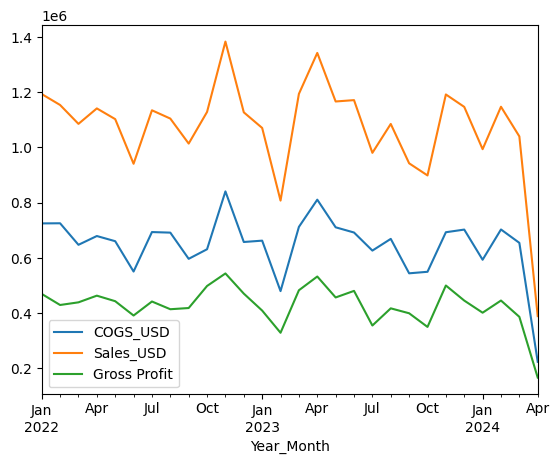

In [56]:
Data['Plant_FACT']['Year_Month'] = Data['Plant_FACT']['Date_Time'].dt.to_period('M')
sales_profit_pivot = pd.pivot_table(
    Data['Plant_FACT'],
    index='Year_Month',
    values=['Sales_USD', 'COGS_USD'],
    aggfunc='sum'
)
sales_profit_pivot['Gross Profit'] = sales_profit_pivot['Sales_USD'] - sales_profit_pivot['COGS_USD']
sales_profit_pivot.plot()

#### Identify the best-selling & highest-revenue products.

In [57]:
top_products_pivot = pd.pivot_table(
    Data['Plant_FACT'],
    index='Product_id',
    values=['Sales_USD', 'quantity', 'Price_USD'],
    aggfunc={'Sales_USD': 'sum', 'quantity': 'sum', 'Price_USD': 'mean'}
).sort_values(by='Sales_USD', ascending=False)
top_products_pivot.head(10)

,Price_USD,Sales_USD,quantity
Product_id,,,
2659,34.216637,103373.05,3885.93
2381,310.475987,93576.82,2258.38
2561,35.669721,92107.39,3263.54
2940,26.822958,89288.14,4062.83
2352,48.031889,88998.85,4032.00
2206,48.356367,85774.10,3842.15
2779,48.679599,84093.62,3684.89
2028,25.432463,83366.99,3621.63
2983,24.594726,82276.04,3390.12


#### Identify most valuable customers based on revenue & profit

In [58]:
account_performance_pivot = pd.pivot_table(
    Data['Plant_FACT'],
    index='Account_id',
    values=['Sales_USD', 'COGS_USD'],
    aggfunc='sum'
)
account_performance_pivot['Gross Profit'] = account_performance_pivot['Sales_USD'] - account_performance_pivot['COGS_USD']
account_performance_pivot.sort_values(by='Gross Profit', ascending=False).head(10)

,COGS_USD,Sales_USD,Gross Profit
Account_id,,,
1930-94174 CEDEX-3,47859.93411,96253.63,48393.69589
1492--48,65321.71102,110599.65,45277.93898
1273-68610-000-92,30745.32847,75710.16,44964.83153
2157--72,45871.84101,87923.43,42051.58899
2188-65765-000-176,31685.36816,71927.52,40242.15184
2053-105 22-6,55960.61646,95744.62,39784.00354
2269-798 43-8287,36963.94199,75877.21,38913.26801
2558-3070-605-8,41032.35864,79780.00,38747.64136
2193--1413,50736.81666,88618.66,37881.84334


#### Identify years of peak performance & decline

In [59]:
Data['Plant_FACT']['Year'] = Data['Plant_FACT']['Date_Time'].dt.year  # Group by Year
yearly_sales_pivot = pd.pivot_table(
    Data['Plant_FACT'],
    index='Year',
    values='Sales_USD',
    aggfunc='sum'
)
yearly_sales_pivot['Sales Growth (%)'] = yearly_sales_pivot['Sales_USD'].pct_change() * 100
yearly_sales_pivot

,Sales_USD,Sales Growth (%)
Year,,
2022,13509613.82,NaN
2023,12997350.02,-3.791846
2024,3569324.72,-72.538058
